### Practice Session 1: Importing, cleaning and visualizing data

We will put what we have just seen into action using the [FRED-MD](https://research.stlouisfed.org/econ/mccracken/fred-databases/) dataset. 

The FRED-MD is a dataset that includes about 130 macroeconomic time series for the US, and is a widely used dataset in economics.  See also the working paper describing the data [here](https://s3.amazonaws.com/real.stlouisfed.org/wp/2015/2015-012.pdf)

Today, we will download the data, transform it into features, deal with NAs and visualize some of it.


The first step is to mount the google drive:

Now, you will need to import the following libraries: pandas, numpy, matplotlib.pyplot and seaborn. 

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# load the data
fred_md = pd.read_csv('https://files.stlouisfed.org/files/htdocs/fred-md/monthly/2022-05.csv')

Great! We have the data. The first thing we want to do is understand the structure of the data. It helps to get a quick glance at it. Lets inspect what this DataFrame holds. If you have done everything correctly, the next bit of code should output a table containing the data we have just downloaded.

In [165]:
fred_md

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2442.158,2293.2,17.272,2.922664e+05,18235.77392,22.0733,23.4027,22.2858,31.5688,...,17.791,11.326,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2,2/1/1959,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.5056,23.7185,22.4788,31.8004,...,17.798,11.343,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3,3/1/1959,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.8298,23.8621,22.5892,31.8004,...,17.785,11.363,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4,4/1/1959,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.3161,24.2067,22.9201,32.3021,...,17.796,11.403,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,12/1/2021,17791.488,14465.3,123.868,1.562935e+06,634393.00000,101.7015,100.8807,101.3610,100.3458,...,106.351,126.834,27.17,31.25,24.38,70.6,370554.92,753781.25,5678.9640,21.2985
757,1/1/2022,17711.363,14444.5,125.781,1.581814e+06,651557.00000,102.5596,101.7294,102.2818,101.6742,...,107.154,127.248,27.31,31.44,24.51,67.2,370286.86,751635.23,5777.3631,22.9143
758,2/1/2022,17727.726,14485.8,125.878,1.570284e+06,662321.00000,103.5845,102.9275,103.3749,102.3062,...,109.075,127.566,27.42,31.60,24.56,62.8,374193.90,753730.65,5818.5663,26.1429
759,3/1/2022,17666.265,14447.6,126.480,1.551969e+06,671648.00000,104.4741,103.6544,104.3039,103.0778,...,112.130,128.165,27.50,31.67,24.71,59.4,369346.54,747716.57,5822.2776,26.9368


A lot of info to digest. First, note that the first row of our data consists of _Transform_. This indicates the transformation that should be applied to the column. In this case, we transform the data because these time series are known to be _nonstationary_, and we prefer to deal with _stationary_ series. From the working paper, we have the following codes:
+ (1) no transformation;
+ (2) $\Delta x_t$;
+ (3) $\Delta^2 x_t$;
+ (4) log(xt);
+ (5) $\Delta$ log(xt); 
+ (6) $\Delta^2$ log(xt) and  (7) $\Delta(x_t/x_{t−1} − 1.0)$, where $\Delta x_t = x_t - x_{t-1}$.

See the working paper for more details.

Next, create a variable called ``transf`` to hold the first row of our ``data`` DataFrame. This row will contain the transformation to be applied to each column of our data. What are the **unique** transformations we have to deal with?

In [166]:
# 3 Collect transformations
transf = fred_md.iloc[0,]
transf.unique()

array(['Transform:', 5.0, 2.0, 1.0, 4, 6.0, 7], dtype=object)

We have 6 transformations to deal with. If the transformation code is 1, the original series is returned. If the transformation code is 2, we need to take first differences. If the transformation code is 4, we need to take the log. If 5, we take the first differences of the logs, if 6, the second differences of the logs. Finally, 7 is the differences in the growth rates. There are many good ways to deal with this problem. For simplicity, we will create a loop that goes over all columns, transforms it and stores it in a variable called ``dt``, our transformed dataset.

Lets begin by creating a pandas dataframe called ``dt`` with the same size as our data to hold the data transformations. Note that this dataframe should have one less row than the the variable ``data``. *Hint*: you may want to use the option index when you are creating the dataframe. Your index should start from 1 and go to the number of rows in ``data``. ``data.shape`` tells you the dimensions of your data.

In [167]:
# 4 create a dataframe (dt) with the same sizes as the data to hold the transformed data
print(fred_md.shape)
dt = pd.DataFrame(index = range(1, fred_md.shape[0]),
                  columns=fred_md.columns)
print(dt.shape)

(761, 128)
(760, 128)


The column names of both ``data`` and ``dt`` should be the same. We can check that using:

In [168]:
(fred_md.columns == dt.columns).mean()

1.0

Lets write out the loop to construct the desired transformations. *Hint*: you may find the method ``.diff()`` useful.

In [169]:
fred_md.shape[1]

128

In [170]:
# 5 Carrying out transformations:

for i in range (0, fred_md.shape[1]):
  di = fred_md.iloc[1:, i]
  
  if (transf[i] == 2):
    dt.iloc[:, i] = di.diff(1)
    
  elif (transf[i] == 4):
    dt.iloc[:, i] = np.log(di)
    
  elif (transf[i] == 5):
    dt.iloc[:, i] = np.log(di).diff(1)
    
  elif (transf[i] == 6):
    dt.iloc[:, i] = np.log(di).diff(2)
  
  elif (transf[i] == 7):
    aux = [(di[T] / di[T-1]) - 1 for T in range(2, fred_md.shape[0])]
    dt.iloc[1:, i] = pd.Series(aux).diff(1)
  
  else: 
    dt.iloc[:, i] = di


C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3568727082.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt.iloc[:, i] = np.log(di).diff(1)
C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3568727082.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt.iloc[:, i] = di.diff(1)
C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3568727082.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] =

In [171]:
dt

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1,1/1/1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/1959,0.003931,0.003613,0.010368,0.007358,0.007310,0.019395,0.013404,0.008623,0.007310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/1/1959,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,...,-0.000337,0.003261,0.009346,0.000000,0.014599,NaN,0.004929,0.004138,-0.030921,NaN
4,4/1/1959,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,...,-0.000112,0.005276,0.009302,0.004057,0.014528,NaN,0.021992,0.015011,-0.020784,NaN
5,5/1/1959,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,...,-0.000450,0.005091,0.009259,0.012171,0.004819,NaN,0.036955,0.023766,-0.011197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,12/1/2021,-0.000581,0.000152,-0.014204,-0.006086,-0.016180,-0.002908,-0.003690,-0.003185,-0.004600,...,0.013185,0.009363,0.010731,0.009646,0.008651,3.2,0.002742,-0.002705,0.026727,21.2985
757,1/1/2022,-0.004514,-0.001439,0.015326,0.012007,0.026696,0.008402,0.008378,0.009043,0.013151,...,0.012225,0.007652,0.011787,0.012804,0.011077,-3.4,0.000820,-0.004020,0.029911,22.9143
758,2/1/2022,0.000923,0.002855,0.000771,-0.007316,0.016385,0.009944,0.011709,0.010630,0.006197,...,0.025291,0.005755,0.009159,0.011138,0.007356,-4.4,0.009772,-0.000067,0.024285,26.1429
759,3/1/2022,-0.003473,-0.002641,0.004771,-0.011732,0.013984,0.008551,0.007037,0.008947,0.007514,...,0.045392,0.007181,0.006933,0.007289,0.008127,-3.4,-0.002543,-0.005227,0.007744,26.9368


Next, we want to convert data into datatime objects

In [172]:
# 6 We then convert dates to datetime objects
dt['sasdate'] = pd.to_datetime(dt.sasdate , format = '%m/%d/%Y')
# Next, rename the column `sasdate` to `dates`
dt.rename(columns = {'sasdate': 'dates'}, 
          inplace = True)

# your code here
dt.dates

1     1959-01-01
2     1959-02-01
3     1959-03-01
4     1959-04-01
5     1959-05-01
         ...    
756   2021-12-01
757   2022-01-01
758   2022-02-01
759   2022-03-01
760   2022-04-01
Name: dates, Length: 760, dtype: datetime64[ns]

We have our transformed data! Let us have a glance at it and compare with the original data. We are particularly interested in the Industrial Production (INDPRO) variable. Create an area plot of the original INDPRO variable, with the dates on the x axis.

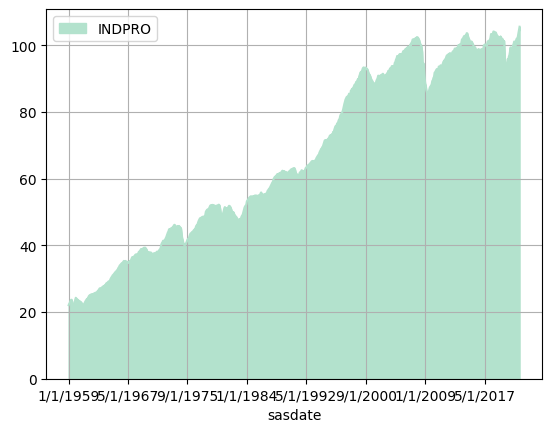

In [173]:
# 7 Create an area plot of the original INDPRO variable
ax = fred_md.iloc[1:, ].plot.area(x = 'sasdate',
                                  y = 'INDPRO',
                                  colormap = 'Pastel2')
ax.grid()
plt.show()

C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3410605810.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x = 'dates',


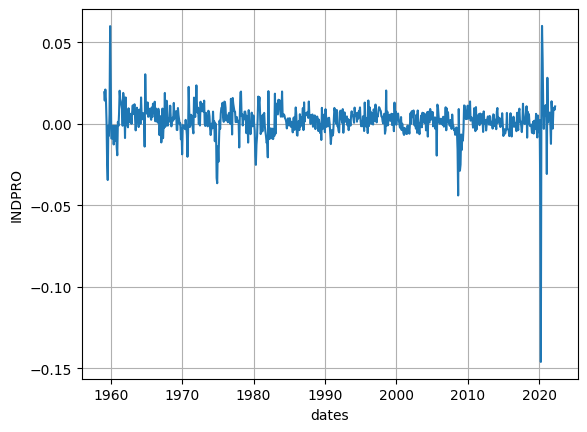

In [174]:
# 8 Next, lets see a line plot of the transformed INDPRO variable.
ax = sns.lineplot(x = 'dates',
                  y = 'INDPRO',
                  data = dt,
                  palette = 'RdBu')
ax.grid()
plt.show()

What is the minimum, maximum, mean and median of Industrial Production (INDPRO)?

In [175]:
# 9 Summary statistics
dt['INDPRO'].describe()

count    759.000000
mean       0.002062
std        0.010159
min       -0.146100
25%       -0.001727
50%        0.002542
75%        0.006616
max        0.060116
Name: INDPRO, dtype: float64

Construct a histogram of the INDPRO variable.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,
          6.,  17., 161., 449., 101.,  15.,   1.,   1.,   2.]),
 array([-0.14609953, -0.13578877, -0.12547801, -0.11516725, -0.10485649,
        -0.09454574, -0.08423498, -0.07392422, -0.06361346, -0.0533027 ,
        -0.04299195, -0.03268119, -0.02237043, -0.01205967, -0.00174892,
         0.00856184,  0.0188726 ,  0.02918336,  0.03949412,  0.04980487,
         0.06011563]),
 <BarContainer object of 20 artists>)

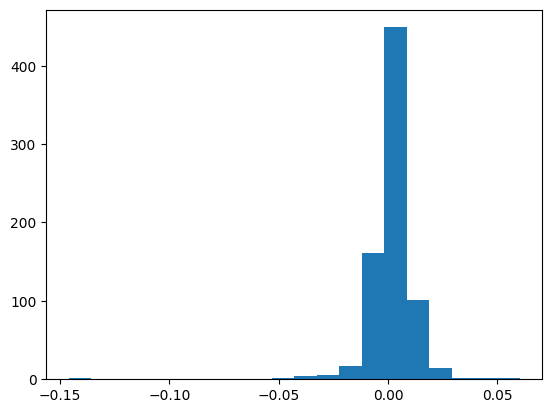

In [176]:
plt.hist(dt['INDPRO'], bins = 20)

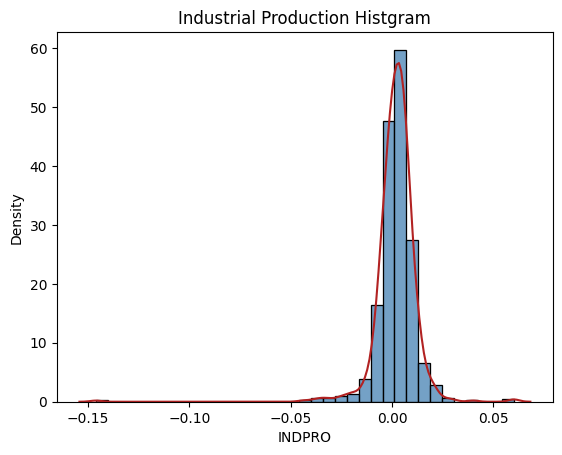

In [177]:
sns.histplot(dt['INDPRO'], 
             color = 'steelblue', 
             bins = 35,
             stat = 'density')

sns.kdeplot(dt['INDPRO'], color = 'firebrick')
plt.title('Industrial Production Histgram')
plt.show()

Another useful plot is a heatmap. use seaborn and the method ``.corr()`` to construct and plot the correlation matrix of our transformed data.

C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\2830972208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(dt.corr(), cmap = 'RdBu', xticklabels = '')


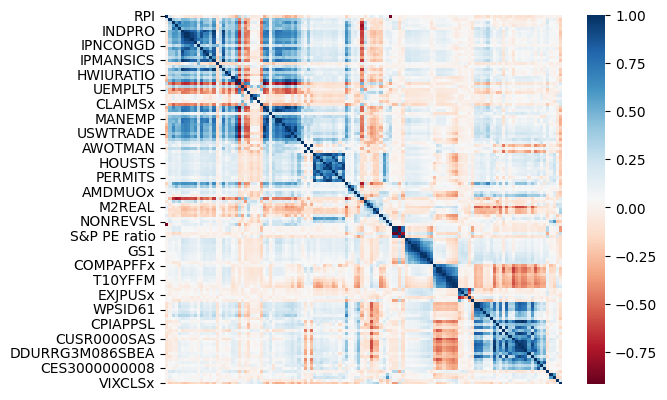

In [178]:
ax = sns.heatmap(dt.corr(), cmap = 'RdBu', xticklabels = '')

Select the ``RPI, INDPRO, PAYEMS, S&P 500`` and ``EXUSUKx`` series from our transfomed dataset.
Then, construct a violin plot with these variables.

c:\Users\wangc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


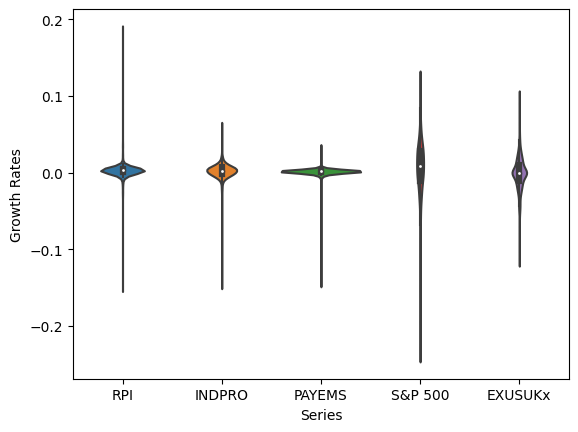

In [179]:
sel = ['RPI', 'INDPRO', 'PAYEMS', 'S&P 500', 'EXUSUKx']
ax = sns.violinplot(data = dt[sel])

ax.set_ylabel('Growth Rates')
ax.set_xlabel('Series')
plt.show()

### Dealing with NAS

Once our data is transformed and we are acquainted with it, we want to deal with the NA values. Lets begin by using the method ``.isna()`` to compute the percentage of NA values in each column of our transformed dataset. Store the results from this computation (multiplied by 100) in a variable named ``NAS``. Which are the 10 columns with the most NAs?

In [180]:
NAS = dt.isna().mean()*100
NAS.sort_values(ascending = False).head(10)

ACOGNO           52.500000
UMCSENTx         30.131579
TWEXAFEGSMTHx    22.236842
ANDENOx          14.473684
VIXCLSx           5.526316
PERMIT            1.578947
PERMITMW          1.578947
PERMITS           1.578947
PERMITW           1.578947
PERMITNE          1.578947
dtype: float64

Construct a barplot containing the percentage of NAs for all columns for which we have more than 1% of missing NAS ( i. e ``NAS > 1`` )

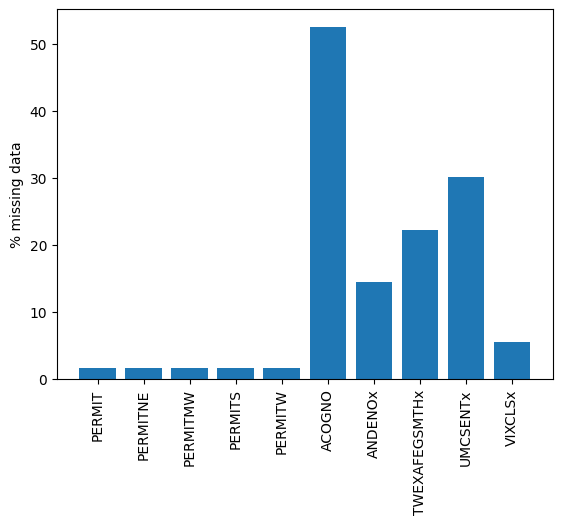

In [181]:
plt.bar(NAS[NAS > 1].index, 
        NAS[NAS > 1].values)
plt.xticks(rotation = 90)
plt.ylabel('% missing data')
plt.show()

Lets drop series with more than 10% of NAs. Print the shape of the new dataframe.

In [182]:
dt_n = dt.drop(NAS.index[NAS.values > 10], axis = 1)
print('New dataset is %s by %s' % dt_n.shape)

New dataset is 760 by 124


How many series have the last observation as NA? How about the last 2 observations? how about the first observation? and the first 2 observations?

In [183]:
print(np.sum(dt_n.tail(1).isna().mean() == 1))
print(np.sum(dt_n.tail(2).isna().sum() == 2))
print(np.sum(dt_n.head(1).isna().mean() == 1))
print(np.sum(dt_n.head(2).isna().sum() == 2))

11
1
108
40


It seems that we may want to drop the 2 first and last observations. Perhaps there is no data yet for these observations. We do that in the box below.

In [184]:
dt_n1 = dt_n.iloc[3:dt_n.shape[0]-1, ]
dt_n1.shape

(756, 124)

In [185]:
print(dt_n1.shape)
dt_temp = dt_n.drop([1,2,dt_n.shape[0]-1,dt_n.shape[0]], axis=0)
print(dt_temp.shape)


(756, 124)
(756, 124)


For the rest of the NAs, lets just use the ``.fillna()`` method to impute the mean of the series computed over the nonmissing observations.

In [186]:
dt_n1.fillna(dt_n1.mean(), inplace = True)
sum(dt_n1.isna().sum())

C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3279188835.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dt_n1.fillna(dt_n1.mean(), inplace = True)
C:\Users\wangc\AppData\Local\Temp\ipykernel_30620\3279188835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_n1.fillna(dt_n1.mean(), inplace = True)


0

### Adding more information
We have succesfully handled the NAs. Now lets add another piece of information and see how recessions impact the relationship between economic series. We first download a recession indicator:

In [159]:
rec = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?&id=USREC&cosd=1854-12-01&coed=2022-05-01&fq=Monthly')

Then, we tell python that we are working with dates, and rename the ``DATES`` column to ``dates`` to match out data.

In [160]:
rec['DATE'] = pd.to_datetime(rec.DATE, format = '%Y-%m-%d')
rec.rename(columns={'DATE':'dates','USREC':'rec'}, inplace=True)

In [187]:
dt_n1

,dates,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
4,1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,...,0.002263,-0.000112,0.005276,0.009302,0.004057,0.014528,0.021992,0.015011,-0.020784,19.322178
5,1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,...,0.002680,-0.000450,0.005091,0.009259,0.012171,0.004819,0.036955,0.023766,-0.011197,19.322178
6,1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001144,0.007034,0.007126,-0.004768,...,0.003655,0.001179,0.005248,0.004619,0.012073,0.004796,0.049509,0.034793,-0.038791,19.322178
7,1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008247,0.013056,...,0.002463,0.003257,0.007241,0.000000,0.012024,0.004796,0.054605,0.042800,-0.021701,19.322178
8,1959-08-01,-0.005637,-0.005748,0.006003,-0.052446,0.006364,-0.034465,-0.007026,-0.002348,0.001179,...,-0.004181,0.002914,0.006521,0.000000,0.011929,-0.009615,0.049502,0.041298,-0.017855,19.322178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2021-11-01,0.000937,0.001585,-0.000796,0.001290,0.005977,0.007324,0.009610,0.008536,0.008958,...,0.018822,0.019499,0.008230,0.006691,0.009062,0.005792,-0.000683,-0.005299,0.034269,19.158600
756,2021-12-01,-0.000581,0.000152,-0.014204,-0.006086,-0.016180,-0.002908,-0.003690,-0.003185,-0.004600,...,0.014540,0.013185,0.009363,0.010731,0.009646,0.008651,0.002742,-0.002705,0.026727,21.298500
757,2022-01-01,-0.004514,-0.001439,0.015326,0.012007,0.026696,0.008402,0.008378,0.009043,0.013151,...,0.019096,0.012225,0.007652,0.011787,0.012804,0.011077,0.000820,-0.004020,0.029911,22.914300
758,2022-02-01,0.000923,0.002855,0.000771,-0.007316,0.016385,0.009944,0.011709,0.010630,0.006197,...,0.007882,0.025291,0.005755,0.009159,0.011138,0.007356,0.009772,-0.000067,0.024285,26.142900


The column ``USREC`` (now just ``rec``) takes the value 1 if the US is in a recession, and 0 otherwise.

Finally, use the ``merge()`` function from ``pandas`` to merge our transformed dataset and the recession indicator. Name the merged data ``dt_merge``.

In [188]:
dt_merge = pd.merge(dt_n1, rec)

Check the last 24 observations to make sure that things make sense.

In [189]:
dt_merge.tail(24)

,dates,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,rec
732,2020-04-01,0.122862,-0.058191,-0.129805,-0.122393,-0.165224,-0.146100,-0.153453,-0.163314,-0.122299,...,-0.021127,-0.002201,-0.003965,-0.019028,0.007951,0.002277,-0.011800,0.030805,40.7369,1
733,2020-05-01,-0.042738,0.017984,0.081153,0.076862,0.171279,0.019308,0.041424,0.050575,0.042626,...,-0.013783,-0.000008,0.003949,-0.006892,0.007052,0.022680,-0.001902,0.007299,30.2692,0
734,2020-06-01,-0.013663,0.016249,0.056888,0.073800,0.083422,0.060116,0.066007,0.078725,0.076816,...,0.006034,0.005396,0.006731,0.021424,-0.005736,0.043321,0.009786,0.043286,31.2070,0
735,2020-07-01,0.005988,0.009918,0.014326,0.026017,0.020721,0.040064,0.042545,0.047389,0.041804,...,0.012312,0.004874,0.003541,0.014077,0.001755,0.041350,0.011340,0.068632,26.6013,0
736,2020-08-01,-0.032790,0.010429,0.006836,0.002130,0.007417,0.010522,0.013035,0.012572,0.007465,...,0.004428,0.004721,0.006294,0.006135,0.011001,0.029458,0.009245,0.049393,22.8791,0
737,2020-09-01,0.005666,0.009884,0.013125,0.006045,0.021601,-0.003034,-0.005733,-0.010124,-0.014893,...,0.000315,0.005454,0.000000,-0.007529,0.008295,0.022314,0.008798,0.032067,27.5874,0
738,2020-10-01,-0.002717,0.013773,0.004091,0.009751,-0.003307,0.010856,0.010733,0.006639,0.002768,...,-0.002811,0.004088,0.001567,-0.004086,0.006108,0.012248,0.005044,0.029249,29.4362,0
739,2020-11-01,-0.010059,-0.002639,-0.005558,-0.001850,-0.011363,0.005320,0.003676,0.004535,0.001491,...,0.000396,0.001198,0.008214,0.012969,0.004771,0.008988,0.003228,0.039066,24.3898,0
740,2020-12-01,0.002689,0.000283,-0.009235,-0.003966,-0.001642,0.011507,0.013917,0.015531,0.021141,...,0.006019,0.004145,0.009353,0.010859,0.008230,0.005937,0.004187,0.039880,22.3826,0
741,2021-01-01,0.091548,-0.006245,0.028960,0.031328,0.053573,0.011353,0.011393,0.013346,0.004138,...,0.014437,0.005213,0.008147,0.007432,0.006900,0.012674,0.007794,0.031410,25.5982,0


What is the average of INDPRO when we are in a recession? What about when we are not?

In [198]:
print(dt_merge.INDPRO[dt_merge.rec == 1].mean())
print(dt_merge.INDPRO[dt_merge.rec == 0].mean())
dt_merge.groupby('rec').mean('INDPRO')


-0.009160049158503743
0.0036173633339686845


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
rec,,,,,,,,,,,,,,,,,,,,,
0,0.002888,0.003159,0.003298,0.003601,0.005764,0.003617,0.003403,0.003456,0.002667,0.005596,...,0.000996,0.004634,0.006124,0.006486,0.006414,0.006367,0.011290,0.011628,0.011047,18.276106
1,0.000629,-0.002722,-0.002200,-0.007523,-0.002308,-0.009160,-0.008220,-0.007943,-0.006179,-0.020777,...,0.004125,0.006221,0.008371,0.008544,0.009185,0.007943,0.006661,0.005611,0.012723,26.600636


Use seaborn scatterplot to draw a plot of ``INDPRO`` and ``S&P 500``, where points that are in a recession get a differente hue (color) than those that are not.

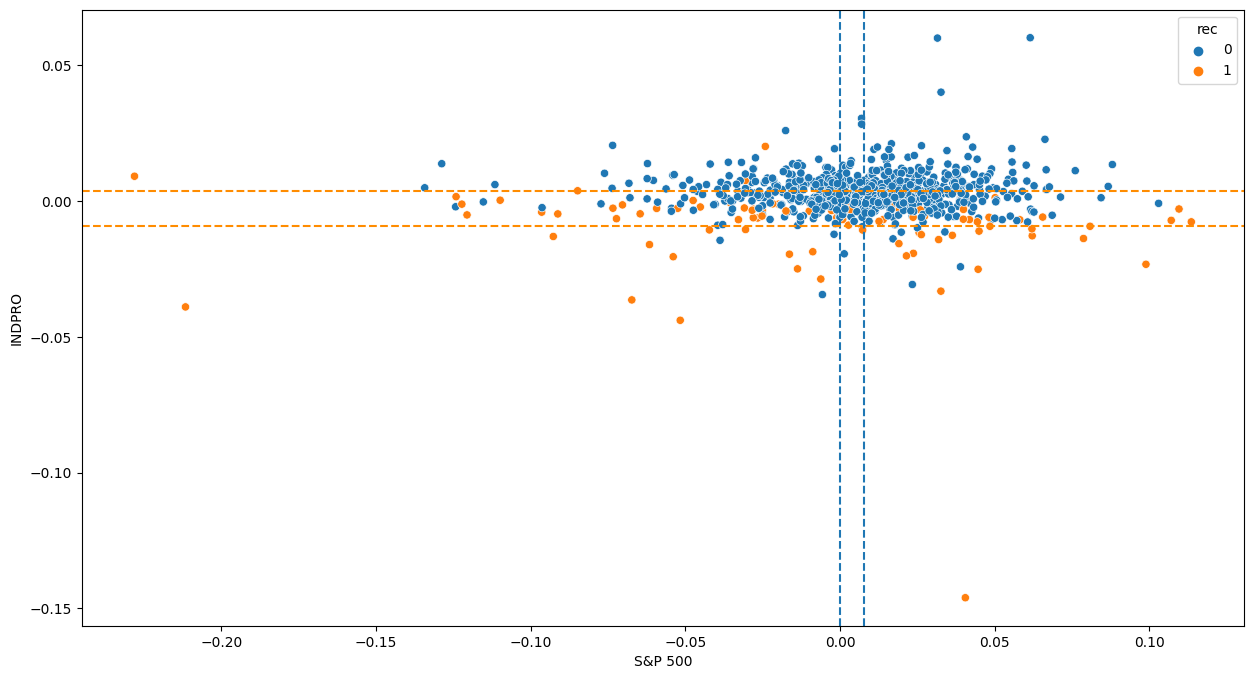

In [215]:
fig, ax1 = plt.subplots(1,1,
                        figsize = (15,8),
                        sharey = True)
ax1 = sns.scatterplot(y = 'INDPRO',
                     x = 'S&P 500',
                     data = dt_merge,
                     hue = 'rec')

ax1.axvline(x = np.mean(dt_merge['S&P 500'][dt_merge.rec == 0]),
            ls = '--')
ax1.axvline(x = np.mean(dt_merge['S&P 500'][dt_merge['rec']] == 1),
            ls = '--')

ax1.axhline(y = np.mean(dt_merge.INDPRO[dt_merge.rec == 1]),
            ls = '--',
            color = 'darkorange')
ax1.axhline(y = np.mean(dt_merge.INDPRO[dt_merge.rec == 0]),
            ls = '--',
            color = 'darkorange')